In [23]:
### Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score


In [19]:
df = pd.read_csv("ma_schools.csv")
df.sample(10)

,School Code,School Name,District Name,District Code,TOTAL_Enrollment,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,School Accountability Percentile (1-99)
157,350237,Mozart,Boston,350000,175,20.6,19.4,38.9,32.0
853,8320605,Montachusett Regional Vocational Technical,Montachusett Regional Vocational Technical,8320000,1429,0.4,14.6,23.0,58.0
1349,7750040,Paxton Center,Wachusett,7750000,495,3.2,14.7,12.7,75.0
547,8280605,Gr Lowell Regional Vocational Technical,Greater Lowell Regional Vocational Technical,8280000,2184,5.4,21.2,43.9,46.0
109,350080,Donald Mckay,Boston,350000,732,59.4,13.0,50.3,30.0
559,1170505,Hopkins Academy,Hadley,1170000,258,1.2,7.8,11.2,74.0
1187,2730008,North Elementary,Somerset,2730000,506,0.0,10.1,22.7,54.0
444,4160305,Boston Preparatory Charter Public School,Boston Preparatory Charter Public (District),4160000,415,10.1,22.2,39.0,64.0
1384,3140305,Watertown Middle,Watertown,3140000,569,7.7,20.7,24.6,48.0
933,2070115,Underwood,Newton,2070000,313,10.2,12.1,12.8,75.0


The data needs to be preprocessed as the variables are on different scales. For K-Means, the proximity measure that is going to be used is Euclidean distance which is not scale invariant. Hence the variables need to be standardized. The categorical variables are removed. School code and school name is the unit of analysis and hence have to be removed. The district name information is contained within district code variable but when the variable is retained, the SSE obtained is higher. Hence both the district variables are removed. The dataframe will finally undergo standardization. 

In [20]:
### Preprocessing the data 
### Dropping unnecessary columns 
cols_to_drop = ["School Code", "School Name", "District Name", "District Code"]
df = df.drop(columns = cols_to_drop)

### Standardizing the data
st = StandardScaler() 
df_process = pd.DataFrame(st.fit_transform(df))
### Setting the column names 
df_process.columns = [col for col in list(df.columns) if col not in cols_to_drop] 
df_process.head(5)

,TOTAL_Enrollment,% English Language Learner,% Students With Disabilities,% Economically Disadvantaged,School Accountability Percentile (1-99)
0,-0.316770,-0.553327,-0.948178,-0.431531,-0.342874
1,0.035437,-0.179680,-0.471036,-0.349430,-0.625935
2,-0.657971,-0.600032,-0.497543,-0.426970,-0.413639
3,-0.589181,-0.584464,-0.802384,-0.376797,0.010952
4,-0.080131,-0.709013,-0.338496,-0.258206,0.470926


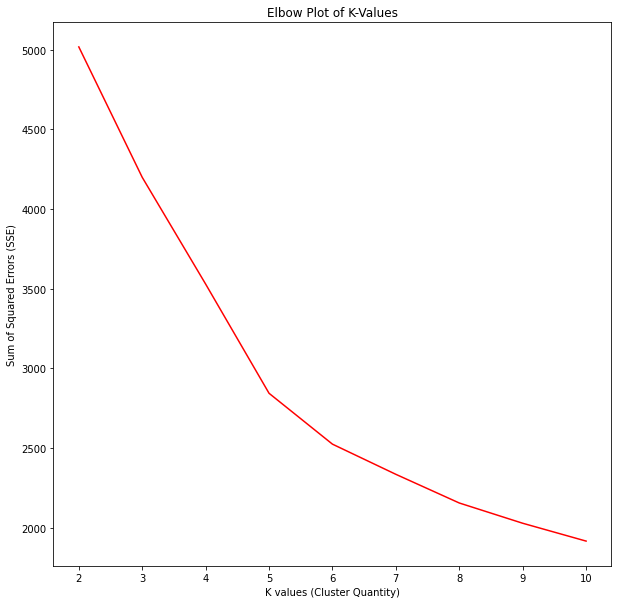

In [21]:
### Elbow plot 
k_values = range(2, 11) 
### Getting the squared sum errors 
sse_values =  [KMeans(n_clusters = i, init = 'random', random_state = 9).fit(df_process).inertia_ for i in k_values]

### Plotting 
plt.figure(figsize=(10,10))
plt.title("Elbow Plot of K-Values")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.plot(k_values, sse_values, color = 'red')
plt.show()

In [26]:
### Silhouette coefficient knee plot 

sil_avg_scores = []

for i in range(2,11) :
    km = KMeans(n_clusters = i, init = 'random', random_state = 9)
    cluster_labels = km.fit_predict(df_process)
    sil_avg_scores.append(silhouette_score(df_process, cluster_labels))


In [27]:
sil_avg_scores

[0.3843554326997463,
 0.3550430977909848,
 0.28089787914163294,
 0.29705611916637753,
 0.25511384371965984,
 0.2442319451734164,
 0.24465103965933524,
 0.23182015430421363,
 0.2142656493267919]

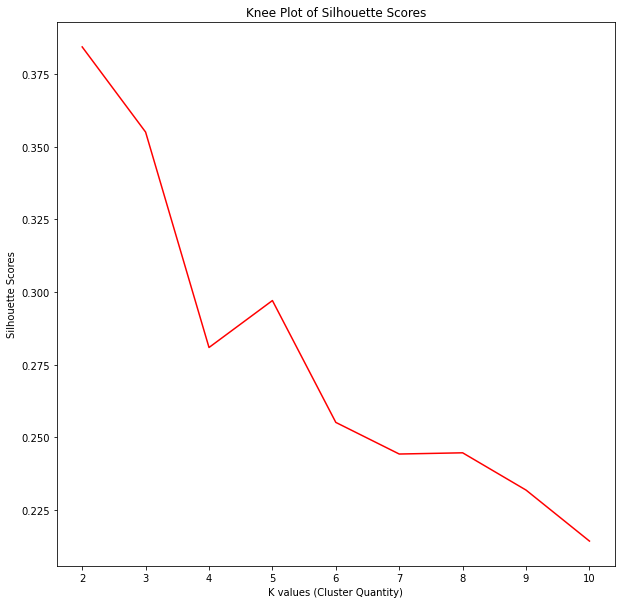

In [28]:
### Plotting 
plt.figure(figsize=(10,10))
plt.title("Knee Plot of Silhouette Scores")
plt.xlabel("K values (Cluster Quantity)")
plt.ylabel("Silhouette Scores")
plt.plot(k_values, sil_avg_scores, color = 'red')
plt.show()

In [ ]:
### Distribution of total enrollment 

